## <b>  Papers Topic Modeling using LDA
[LDA](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0) is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.
    
We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:
* psi, the distribution of words for each topic K;
* phi, the distribution of topics for each document i.
    
Parameters of LDA:
* **Alpha** -  Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document;
* **Beta** - Same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.
    


### <b> Setup 

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation as LDA
import umap.umap_ as umap

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from bokeh.models import Legend
output_notebook()

from src import Cleaning

[nltk_data] Downloading package wordnet to /home/carina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading BokehJS ...

### <b> Data Loading


In [3]:
papers_df = pd.read_csv('../datasets/papers.csv')
papers_df = papers_df[['TITLE', 'ABSTRACT']]

### <b> Data Processing


In [4]:
clean_text = Cleaning.DataCleaning()
papers_df.loc[:, 'clean_title'] = papers_df['TITLE'].apply(lambda x: " ".join(clean_text(x)))
papers_df.loc[:, 'clean_text'] = papers_df['ABSTRACT'].apply(lambda x: " ".join(clean_text(x)))

In [5]:
papers_df[['TITLE', 'clean_title', 'ABSTRACT', 'clean_text']].sample(5)

,TITLE,clean_title,ABSTRACT,clean_text
17825,Conditional Model Selection in Mixed-Effects M...,conditional model selection model,Model selection in mixed models based on the...,model selection mixed model based conditional ...
9545,Gaussian One-Armed Bandit and Optimization of ...,gaussian bandit optimization batch data proces...,We consider the minimax setup for Gaussian o...,consider minimax setup gaussian bandit problem...
8992,Bosonizing three-dimensional quiver gauge theo...,bosonizing quiver gauge theory,We start with the recently conjectured 3d bo...,start recently conjectured bosonization dualit...
8510,T-duality in rational homotopy theory via $L_\...,rational homotopy theory via,We combine Sullivan models from rational hom...,combine sullivan model rational homotopy theor...
5176,Trapped imbalanced fermionic superfluids in on...,trapped imbalanced fermionic superfluids one d...,We propose and analyze a variational wave fu...,propose analyze variational wave function ferm...


## <b> LDA Model

#### <b> Prepare Corpus


In [7]:
doc_clean = papers_df['clean_text']
vectorizer = TfidfVectorizer(max_features=5000, use_idf=True)
doc_term_matrix = vectorizer.fit_transform(doc_clean)

processed_terms = vectorizer.get_feature_names()
print('Words examples in corpus = ', processed_terms[0:5])

Words examples in corpus =  ['ab', 'abc', 'abelian', 'ability', 'able']


In [8]:
number_topics = 6

lda = LDA(n_components=number_topics, doc_topic_prior=2, topic_word_prior=10, n_jobs=-1)
doc_topic_dist = lda.fit_transform(doc_term_matrix)

In [9]:
# Print the topics found by the LDA model
print("Topics found via LDA:")

n_top_words = 10
words = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("\nTopic #%d:" % topic_idx)
    print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topics found via LDA:

Topic #0:
model method network data system algorithm problem result show function

Topic #1:
model network method problem result data system algorithm show function

Topic #2:
model method data algorithm problem network result system show function

Topic #3:
model method system network problem data result algorithm show paper

Topic #4:
model data method network system problem algorithm show result function

Topic #5:
model method data problem algorithm system network result function approach


#### <b> Visualization

In [10]:
n_dimensions=2000
X = doc_topic_dist[:n_dimensions]

embedding = umap.UMAP(n_neighbors=50, 
                      metric='cosine', 
                      n_epochs=200, 
                      random_state=12).fit_transform(X)

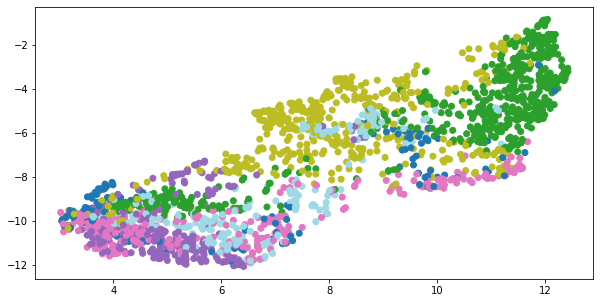

In [11]:
dominant_topics_by_doc = np.argmax(X, axis=1)

plt.figure(figsize=(10, 5))
plt.scatter(embedding[:, 0], embedding[:, 1], c=dominant_topics_by_doc, cmap=plt.cm.get_cmap('tab20'))
plt.show()